# <center>Is home court advantage real?
#### <center> By: Radman Avakoli, Yao(Chengyuan) Yao, Rehan Mondal , Parham Alijani



## <center> Introduction

Home court advantage in sports is the idea of having a slight edge over your opponent due to playing on your home floor, whether this may be because of comfort of the hardwood and rims, or the comfort of sleeping the night before in your own home and driving your own car to the arena throughout the same highway you take everyday, or simply psychological effects. In the NBA (National Basketball Association), a controversial topic has been regarding home court advantage and whether or not teams are impacted by it. Teams play 50% of their regular season games at home, and those who qualify to the playoffs play multiple best of 7 series where the team with the higher seed (better Win-Loss Record) will have 4 out of the 7 games on their home court. 

The question that we will try to answer is, does home court advantage truly exist? Using a representative sample created from the NBA stats website that contains information about NBA games since 2004, we will make inferences on future NBA matches with the same rules and showcase whether or not the home team has an advantage. To do this, we will compare the proportion of wins at home vs away with our sample, and make a conclusion on whether or not the proportion of wins at home is significant enough for us to fail to reject the null hypothesis.


## <center> Preliminary Data

In [1]:
# loading libraries
library(infer)
library(repr)
library(tidyverse)
library(rsample)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# reading data and converting it to a dataframe
games <- read_csv("https://raw.githubusercontent.com/rehan13/NBA-Home-Game-Advantage/main/Data/games.csv") %>% 
    as.data.frame()
head(games, 4)
colnames(games)
games %>% nrow()

Rows: 25796 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): GAME_STATUS_TEXT
dbl  (19): GAME_ID, HOME_TEAM_ID, VISITOR_TEAM_ID, SEASON, TEAM_ID_home, PTS...
date  (1): GAME_DATE_EST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,⋯,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
,<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104,0.398,0.760,⋯,23,53,1610612750,113,0.422,0.875,0.357,21,46,0
2,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101,0.443,0.933,⋯,20,46,1610612739,91,0.419,0.824,0.208,19,40,1
3,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108,0.412,0.813,⋯,28,52,1610612754,119,0.489,1.000,0.389,23,47,0
4,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122,0.484,0.933,⋯,33,55,1610612749,109,0.413,0.696,0.386,27,39,1


[1] "GAME_DATE_EST"    "GAME_ID"          "GAME_STATUS_TEXT" "HOME_TEAM_ID"    
 [5] "VISITOR_TEAM_ID"  "SEASON"           "TEAM_ID_home"     "PTS_home"        
 [9] "FG_PCT_home"      "FT_PCT_home"      "FG3_PCT_home"     "AST_home"        
[13] "REB_home"         "TEAM_ID_away"     "PTS_away"         "FG_PCT_away"     
[17] "FT_PCT_away"      "FG3_PCT_away"     "AST_away"         "REB_away"        
[21] "HOME_TEAM_WINS"

[1] 25796

__Data Wrangling:__
We are interested in 2 dataframes:
* A dataframe with columns type ("home" or "away") and win ("1" for win, "0" for loss) to make inference about winning proportion
* A dataframe with column point difference (home team points - away team points) to make inference about the mean of score difference (i.e. by how much does the home team wins or loses)

In [3]:
## Dataframe 1: obtain columns of interest for calculating proportion of winning when home vs away
# Storing game winning status for every game being the home team
home_games <- games %>%
    summarize(type = "home", win = as.character(HOME_TEAM_WINS))

# Storing game winning status for every game being the away team
away_games <- games %>%
    summarize(type = "away", win = as.character(abs(1-HOME_TEAM_WINS)))

# Combining all home and away game observations
sample_for_prop <- rbind(home_games, away_games)

# Observing our dataframe
head(sample_for_prop, 4)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


,type,win
,<chr>,<chr>
1,home,0
2,home,1
3,home,0
4,home,1


In [4]:
## Dataframe 2
# obtaining the point differnce for every game (home team points - away team points)
sample_for_mean_diff <- games %>%
    filter(!is.na(PTS_home), !is.na(PTS_away)) %>%
    summarize(PTS_home = PTS_home, PTS_away = PTS_away, point_diff = PTS_home - PTS_away)

# Observing our dataframe
head(sample_for_mean_diff, 4)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


,PTS_home,PTS_away,point_diff
,<dbl>,<dbl>,<dbl>
1,104,113,-9
2,101,91,10
3,108,119,-11
4,122,109,13


__Explore:__

Now that we have our dataframes with columns of interest required for each hypothesis test ready, let's quickly explore our sample!

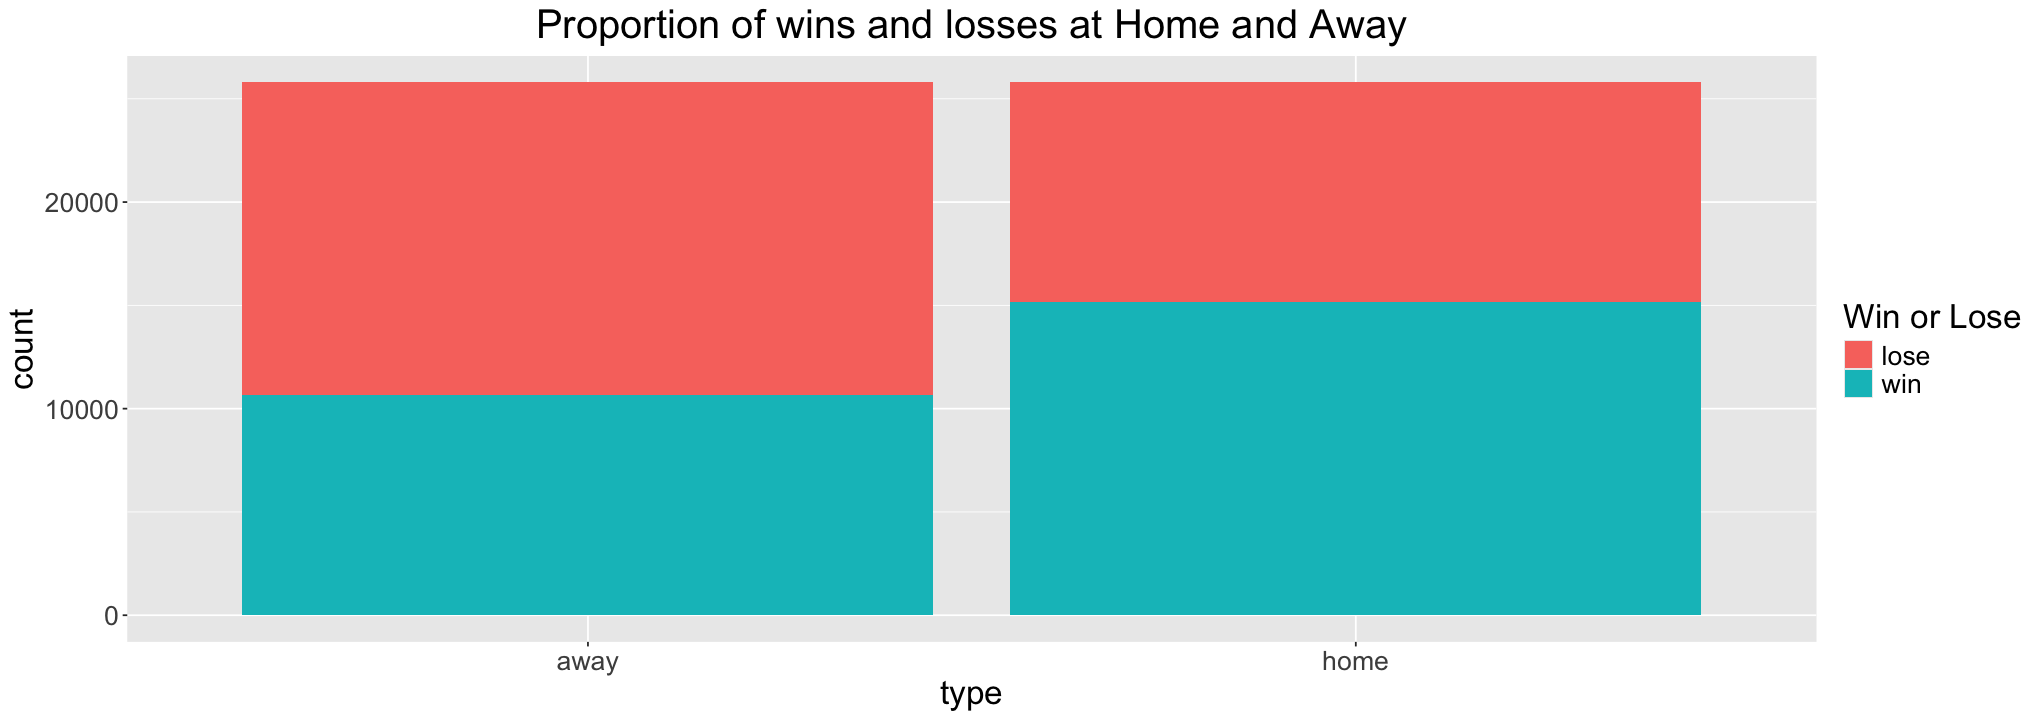

In [5]:
# To scale our plots
options(repr.plot.width=17, repr.plot.height=6, repr.plot.align = "center")

# Resize and visualize the observed difference in proportion on barplot
ggplot(sample_for_prop, aes(x=type, fill=win), fig.align = 'center') +
    geom_bar() +  
    labs(fill = "Win or Lose") +
    scale_fill_discrete(labels=c('lose', 'win')) +
    ggtitle("Proportion of wins and losses at Home and Away") +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))

In [6]:
# Calculating the observed difference in proportion
obs_diff_prop <- sample_for_prop %>% 
  specify(win ~ type, success = "1") %>% 
  calculate(stat = "diff in props", order = c("home", "away")) %>%
  mutate(obs_diff_in_props = stat) %>% select(obs_diff_in_props)
obs_diff_prop

obs_diff_in_props
<dbl>
0.1749884


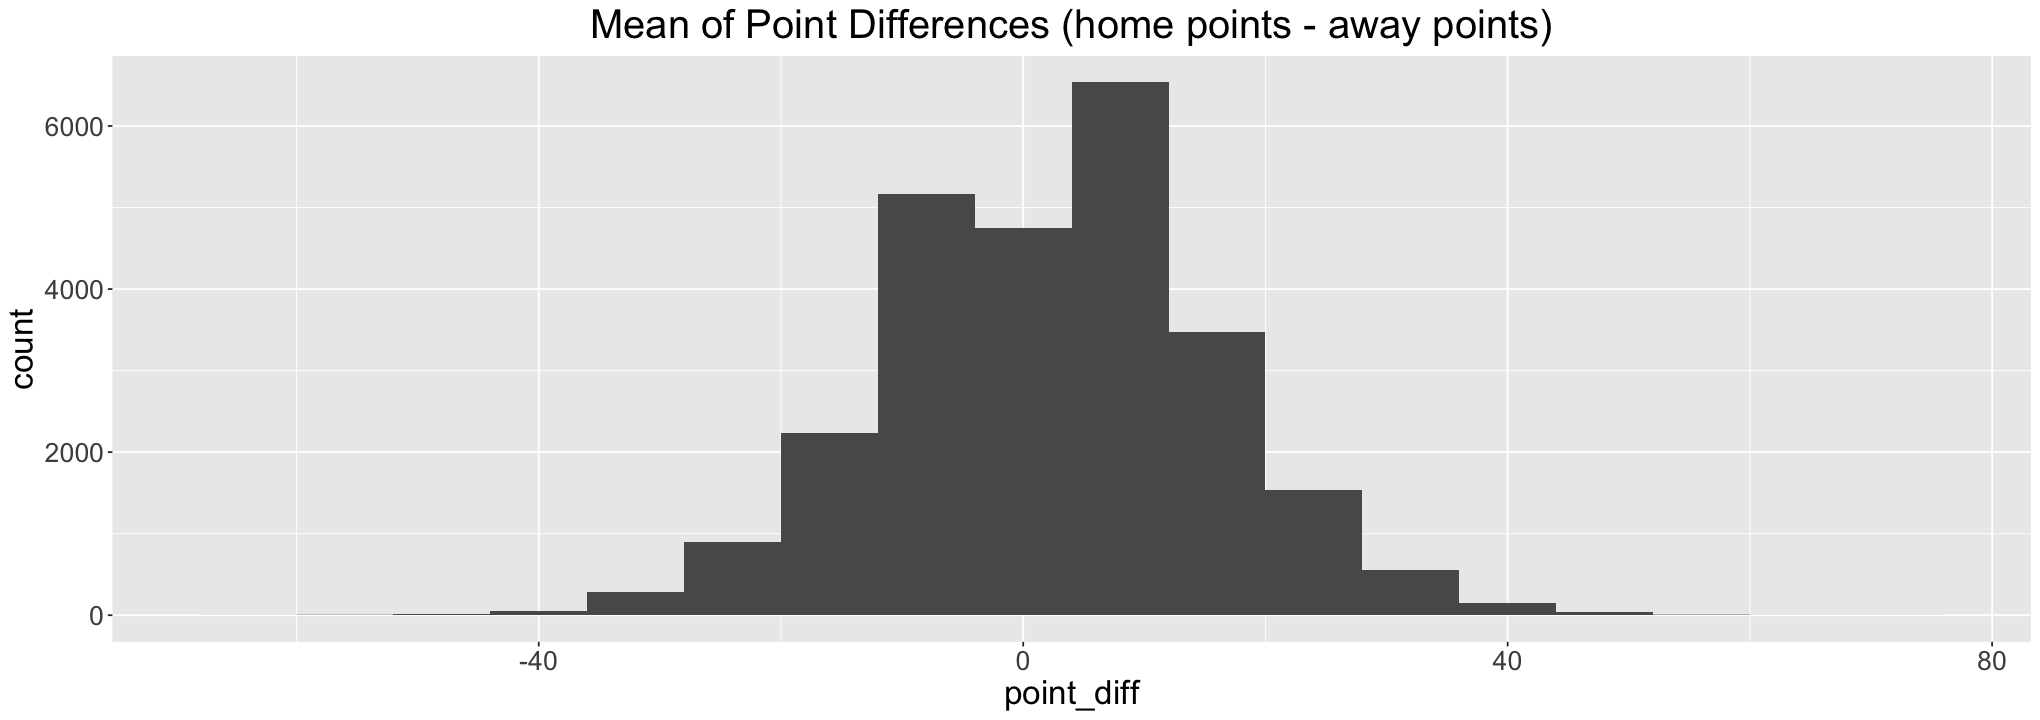

In [7]:
# To scale our plots
options(repr.plot.width=17, repr.plot.height=6, repr.plot.align = "center")

# Resize and visualize the observed mean of point difference on histogram
ggplot(sample_for_mean_diff, aes(x=point_diff), fig.align = 'center') +
    geom_histogram(binwidth=8) + 
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5)) +
    ggtitle("Mean of Point Differences (home points - away points)")
    

In [8]:
# Calculating the observed mean of point difference
obs_mean_diff <- sample_for_mean_diff %>% 
  specify(response = point_diff) %>% 
  calculate(stat = "mean") %>%
  mutate(obs_mean_point_diff = stat) %>% select(obs_mean_point_diff)
obs_mean_diff

obs_mean_point_diff
<dbl>
2.811924


We can observe that our sample data of games has about 17.5% higher proportion of winning when being the home team. The barplot depicts this difference as well.

$\hat{p}_{home} - \hat{p}_{away}=0.175$

Also, the mean for the difference in scores (home points - away points) is 2.812, meaning that on average, the home team beats the opponent team by 2.812 extra points. The histogram shows that the center of the distribution is slightly on the positive side of 0.

 $\hat{\mu} = 2.812$  
 
So these sample statics suggesting that there is an advantage when playing a team plays a game in their home court. But is this observed difference real? Or could it be as a result of sampling variation? Our goal is to use hypothesis testing to check whether the data obtained by our sample provides enough evidence against the claim that home court advantage is not real.

## <center> Methods & Results

Our goal is to use our sample data of all NBA games from season 2004 to 2020 to understand whether home court advantage is real. Since our sample contains the recording of all the games played in the NBA during this time period, our sample seems to be unbias and representative of the population of all NBA games. Therefore we will be able to make a statistical inference and generalize it to the entire population. We will be using hypothesis testing technique to see if our obtained sample provides enough evidence to support that home court advantage is real. More specifically, we will be doing 2 hypotheses testing. One is about winning proportion when being home vs away. The other one is the mean of point difference. This was suggested by prof Melissa. We will also prespecify our significance level to be 10%, meaning we are willing to have a 10% probability of false rejection if our null hypothesis is true.

__More Specifics:__
* `set.seed` for reproducibility
* set our null and alternative hypotheses:
  * For difference in winning proportion:
    * $H_0: \hat{p}_{home} - \hat{p}_{away}= 0$
    * $H_1: \hat{p}_{home} - \hat{p}_{away}>= 0$
  * For mean of difference in score:
    * $H_0: \hat{\mu} = 0$
    * $H_1: \hat{\mu} >= 0$
* use `infer` package for hypothesis testing
  * `specify` the variable of interest
  * `hypothesize` the null
  * `generate` replicates (via permute and/or bootsrapping)
  * `calculate` summary statistic (null model)
* `visualize` the null model along with observed statistics for a visual interpretation
* prespecify a significance level, accepting a certain level of type I and type II erors
* generate confidence intervals for our confidence level, and find out whether it captures the sample statistics
* Accept/Reject our null hypothesis if data provides enough evidence based on the significance level

In [9]:
set.seed(111)
# Hypothesis testing and getting null distribution for difference in winning proportion (p_home_win - P_away_win)
null_distribution_prop <- sample_for_prop %>% 
  specify(formula = win ~ type, success = "1") %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 200, type = "permute") %>%  #TODO: does higher reps work on your computer? My kernel crashes
  calculate(stat = "diff in props", order = c("home", "away"))

head(null_distribution_prop, 4)

replicate,stat
<int>,<dbl>
1,-0.000775314
2,-0.005659792
3,-0.009691425
4,0.003721507


In [10]:
set.seed(111)
#  Hypothesis testing and getting null distribution for mean of point difference (home_points - away_points)
null_distribution_mean_diff <- sample_for_mean_diff %>% 
  specify(response = point_diff)  %>% 
  hypothesize(null = "point", mu=0) %>% 
  generate(reps = 500, type = "bootstrap") %>% 
  calculate(stat = "mean")

head(null_distribution_mean_diff, 4)

replicate,stat
<int>,<dbl>
1,-0.04206717
2,-0.06347044
3,-0.11911896
4,0.03229949


#### Note: 
We used permute for winning proportion, because it resamples by shuffling the Home vs Away values among the observations. In other words, we shuffle the values of our explanatory categorical variable to see if there is any association between this variable and the winning status variable. 

However, we used bootstrapping for resampling in the case of mean of point difference since there is no explanatory variable to shuffle! It is simply generating resamples of point difference observations under the null hypothesis.

In [11]:
# Calculating p-value: Gives us the probability of getting a test statistic as extreme or  
#                      more extreme than the observed test statistic assuming H0 is true
# NOTE: p-value is measured based on the observed test-statistic which we have previously calculated
null_distribution_prop %>% get_p_value(obs_stat = obs_diff_prop, direction= "right")
null_distribution_mean_diff %>% get_p_value(obs_stat = obs_mean_diff, direction= "right")

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation
based on the number of `reps` chosen in the `generate()` step.
ℹ See `get_p_value()` (`?infer::get_p_value()`) for more information.”


p_value
<dbl>
0


Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation
based on the number of `reps` chosen in the `generate()` step.
ℹ See `get_p_value()` (`?infer::get_p_value()`) for more information.”


p_value
<dbl>
0


In [12]:
# get CI with 90% confidence level two-sided, meaning 5% significance level for 1-sided right-tailed test
diff_in_props_ci <- null_distribution_prop %>% get_ci(level = 0.90, type = "percentile")
Mean_point_diff_ci <- null_distribution_mean_diff %>% get_ci(level = 0.90, type = "percentile")

diff_in_props_ci
Mean_point_diff_ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.006911924,0.00682664


lower_ci,upper_ci
<dbl>,<dbl>
-0.1425108,0.1412597


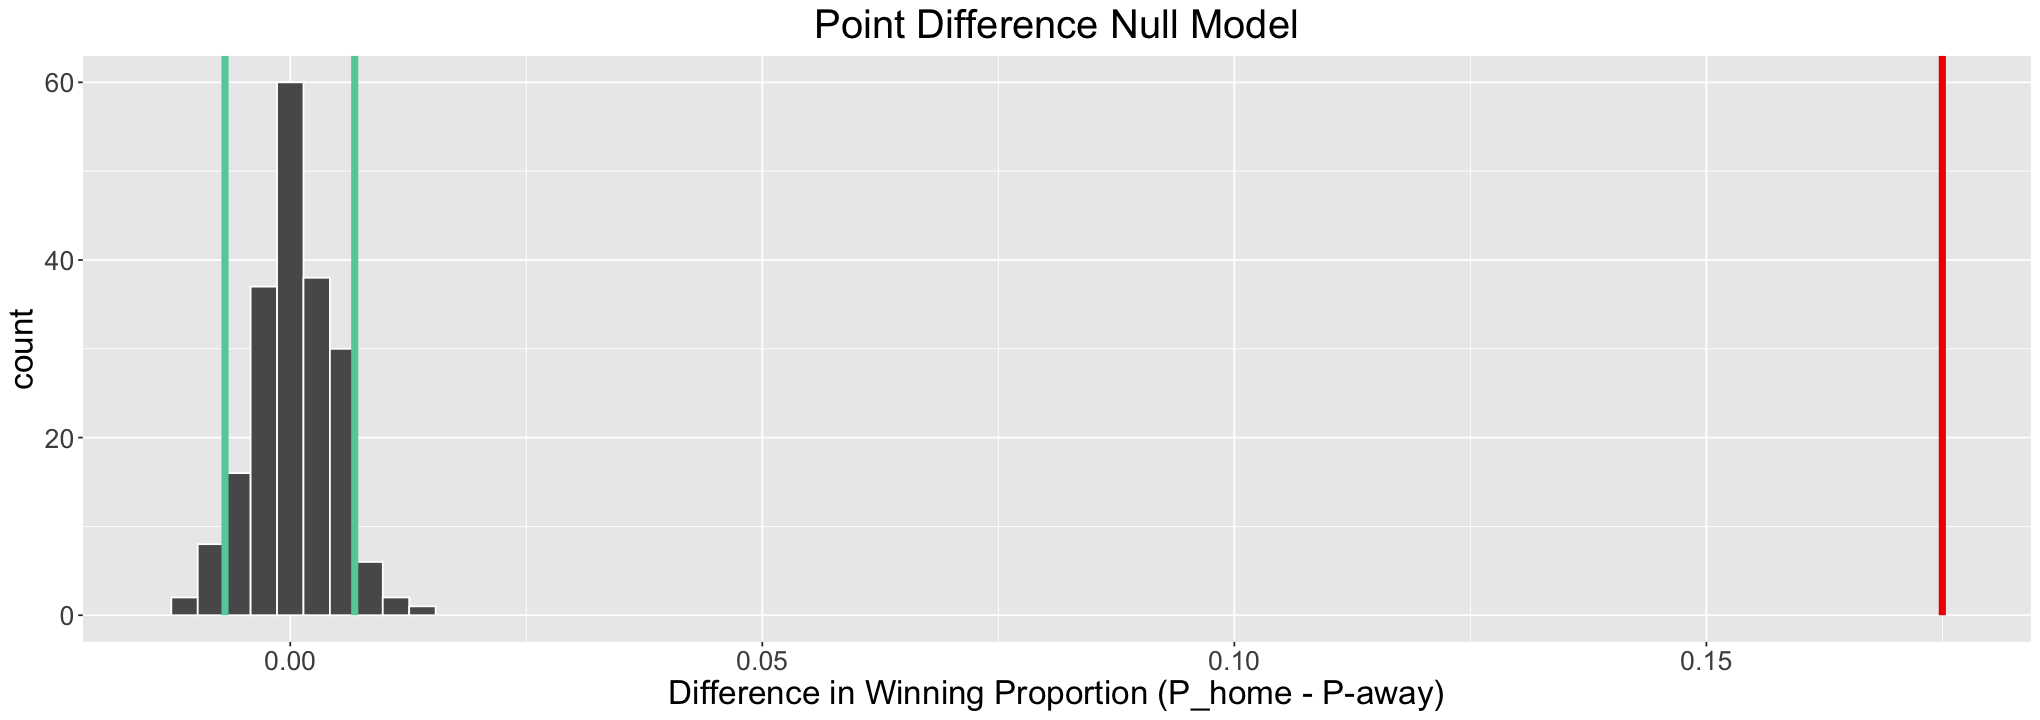

In [13]:
# To scale our plots
options(repr.plot.width=17, repr.plot.height=6, repr.plot.align = "center")

# Visualize the null distributions along with p-value and 90% CI
visualize(null_distribution_prop, bins = 10) + 
    shade_p_value(obs_stat = obs_diff_prop, direction = "right") +
    shade_ci(endpoints = diff_in_props_ci, fill = NULL) + 
    labs(title="Point Difference Null Model", x="Difference in Winning Proportion (P_home - P-away)") +
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))
    

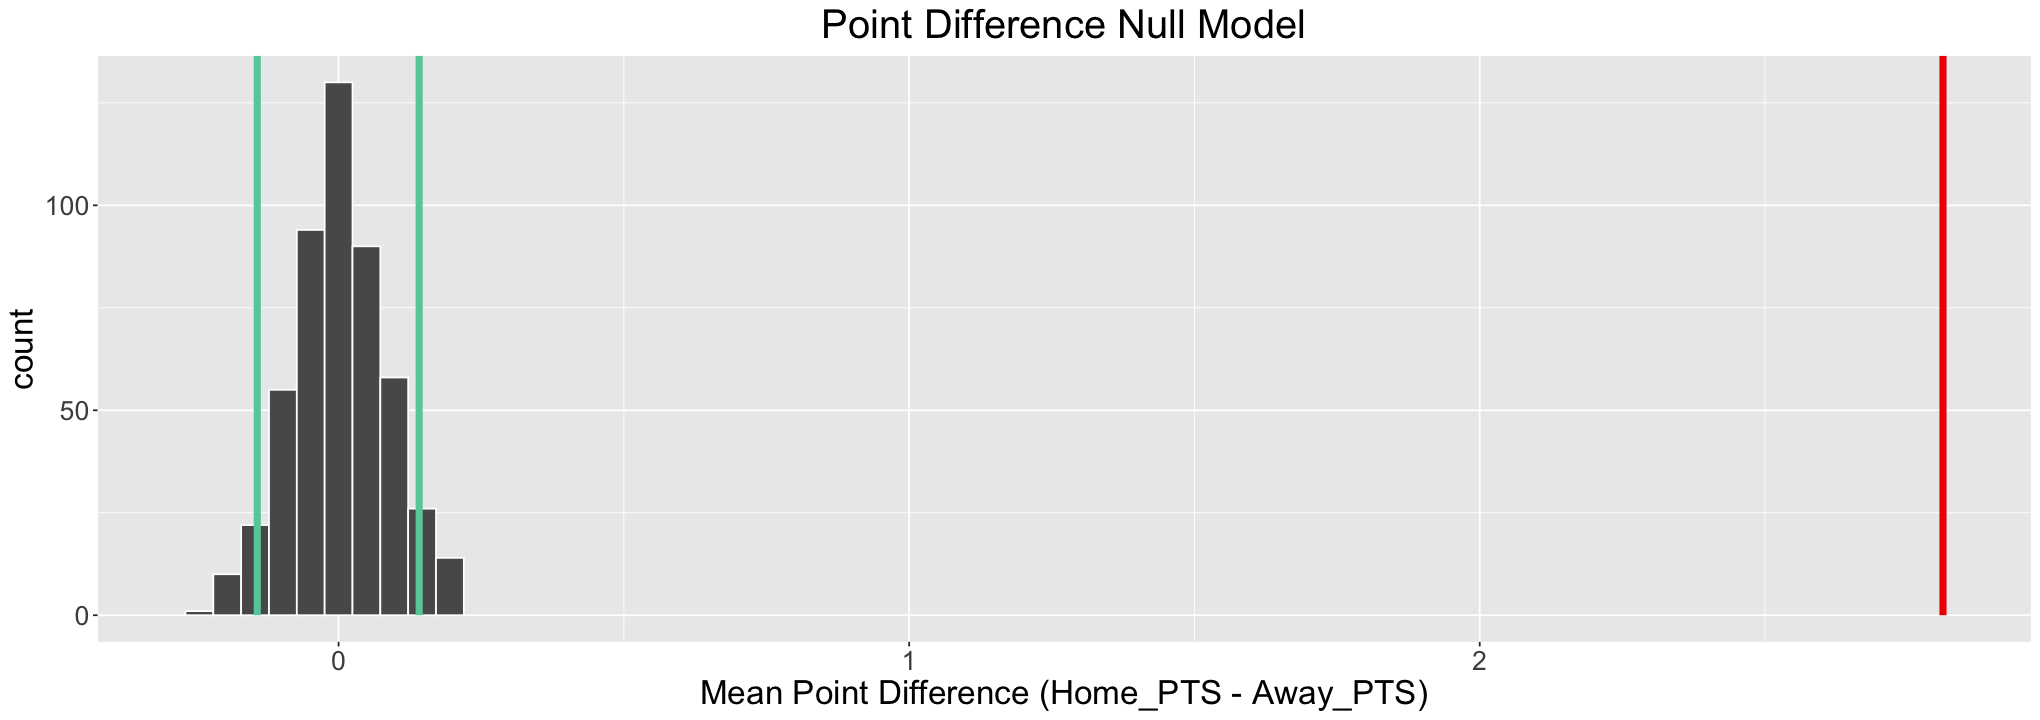

In [14]:
# To scale our plots
options(repr.plot.width=17, repr.plot.height=6, repr.plot.align = "center")

# Visualize the null distributions along with p-value and 90% CI

visualize(null_distribution_mean_diff, bins = 10) + 
    shade_p_value(obs_stat = obs_mean_diff, direction = "right") +
    shade_ci(endpoints = Mean_point_diff_ci, fill = NULL) + 
    labs(title="Point Difference Null Model", x="Mean Point Difference (Home_PTS - Away_PTS)") + 
    theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5))
    fig.align = 'center'

## <center> Discussion:

From our findings, we conclude that there is a significant difference between our null hypotheses and our observed test statistics, meaning this difference is most likely not due to sample variability, and so we reject the null hypotheses in favor of the alternative. Therefore, we believe that the proportion of winning is higher at home than away, and the mean point difference (Home_PTS - Away_PTS) is higher than 0. This is vivid from both the p-values as well as our 90% confidence intervals.

Obtaining a p-value of 0 indicates there not even a single resample that was as extreme as the observed statistic. Having p-value < significance level for both hypotheses indicates rejection of H0. Even at lower confidence levels than 10%, we still would reach the same conclusion. As a result of rejection, we are only prone to making Type I error, which is nearly impossible because our sample is representative of the population and our p-value was 0, meaning there is 0 probability of getting a test statistic as extreme as the observed statistic. This evidence is enough to reject the null hypothesis and conclude the alternative as a result of the significant difference of our observed test statistics.

In addition, we obtained the corresponding 90% confidence level Confidence Intervals for our null models as well. In both cases, our observed test statistics fall much higher than the upper quantile of our intervals as can be seen from the graphs. More specifically, the test statistic for winning proportion is 0.175 which is many multiples higher than the upper quantile of the confidence interval is about 0.007. Similarly, the test statistic for mean of point difference being 2.812 is many multiples higher than 0.141 which is the upper quantile of the confidence interval. Our intervals not capturing the observed test statistics is another indication that these observed differences are real!

Before this research, we expected to discover that playing as the home team is advantageous due to many factors such as comfort, stress levels, and other psychological effects. Our personal experience of playing sports games has also lead us to this belief as well, so our findings were not very surprising.

Our findings can impact how the game is played. Discovering that the home team has an advantage, the game would be unbalanced for the opponent as the morale of the players would be affected based on where they are playing. Consequently, individual players’ performance may be negatively impacted. Our discovery could also lead to a change in how fixtures are set to regulate a balance to produce more even odds of winning for both teams. Adjustments in the playoff rules could also make matchups more competitive in the standpoint of pure skill rather than the sole factor of having home court advantage. Even if the rules remain, this discovery could be useful for further research into the causation of home court advantage, and teams and the NBA can invest more effort into eliminating the causing factors. In addition, teams can plan ahead for the disadvantaged away games by developing new strategies to increase their performance.

Here are some future questions (or research questions) that arise from our discovery:
* What factors are most influential that lead to home court advantage?
* Does distance traveled for a game increase the effect of playing away? 
* Do experienced players feel less of an impact from away court disatvantage or more?


## <center> Citation

1. Beck, Howard. “The Truth about NBA Home-Court Advantage.” Bleacher Report, Bleacher Report, 18 Aug. 2020, https://bleacherreport.com/articles/2905080-the-truth-about-nba-home-court-advantage#:~:text=The%20NBA%20has%20the%20widest,of%20all%20games%20since%201984\. 

2. Lauga, Nathan. “NBA Games Data.” Kaggle, 13 Mar. 2022, https://www.kaggle.com/datasets/nathanlauga/nba-games?resource=download. 

3. “Hypothesis Testing.” Statistics How To, 25 June 2022, https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/. 